In [33]:

import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from sympy.physics.vector import *
N = ReferenceFrame('N')
f_1 =[]
f_2 = []
# todo add d axis
t, r, a, l, rc, w, m, mc, m3 = sy.symbols('t r a l rc w m mc m3')
base_v = (0.025,0.1, 0.025, 55, 0.012, 0.008,0.4)
deg = (0, 144, 216, 288, 72)
r3 = a*l
r4 = r-r3
A = w**2 * (r *( m3 + m)-mc*rc)
B = w**2 * (r3 /l*m3 + m)*r**2/l
C = (r4 /l*m3*r-mc*rc)*w**2

1
w**2*(-mc*rc + r*(m + m3))*cos(t) + r**2*w**2*(a*m3 + m)*cos(2*t)/l
(3025*(0.0005 - 0.025*mc)*cos(t) + 0.287375*cos(2*t))*N.x + 3025*(0.0005 - 0.025*mc)*sin(t)*N.y
fs,  0.0048
(1.1495*cos(t) + 0.287375*cos(2*t))*N.x + 1.1495*sin(t)*N.y
ma
1.1495*sqrt((cos(t) + 0.25*cos(2*t))**2 + sin(t)**2)
(3025*(0.0005 - 0.025*mc)*cos(t) + 0.287375*cos(2*t))*N.x + 3025*(0.0005 - 0.025*mc)*sin(t)*N.y
fs,  0.0138
(0.468875*cos(t) + 0.287375*cos(2*t))*N.x + 0.468875*sin(t)*N.y
ma
0.468875*sqrt((cos(t) + 0.612903225806452*cos(2*t))**2 + sin(t)**2)
(3025*(0.0005 - 0.025*mc)*cos(t) + 0.287375*cos(2*t))*N.x + 3025*(0.0005 - 0.025*mc)*sin(t)*N.y
fs,  0.02
0.287375*cos(2*t)*N.x
ma
0.287375*sqrt(cos(2*t)**2)


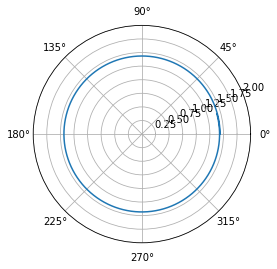

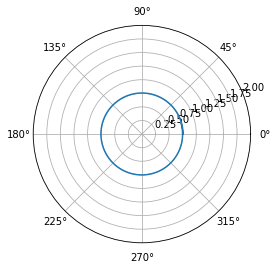

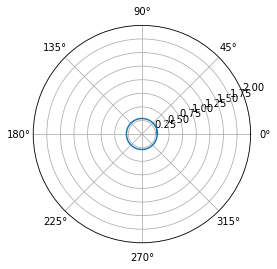

In [34]:
for i in range(1):
    th = t + np.deg2rad(deg[i])
    f1 = A*sy.cos(th)+B*sy.cos(2*th)
    f2 = A * sy.sin(th)
    f_1.append(f1)
    f_2.append(f2)
    print(i+1)
    print(f1)
    # print(f2)

F1 = sum(f_1)
F2 = sum(f_2)


# print(F2)
for i,j in zip((r,l, rc, w,m, m3,a), base_v):
    F1 = F1.subs(i,j)
    F2 = F2.subs(i,j)

for i in (0.0048,0.0138,0.02):
    Fs = F1*N.x + F2*N.y
    print(Fs)
    Fs = Fs.subs(mc,i)
    print('fs, ',i)
    print(Fs)
    ma = Fs.magnitude()
    print('ma')
    print(ma)
    f = sy.lambdify(t, ma)
    sp = np.linspace(0,2*np.pi/base_v[3], 250)
    F_s = f(sp)
    # sy.plot((-F2, F1), (t,0,1))

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(np.rad2deg(sp), F_s)
    ax.set_rmax(2)
# print(F2)



